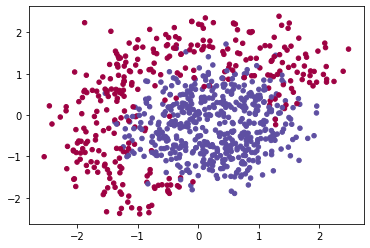

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

with open('train.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('target.npy', 'rb') as fin:
    Y = np.load(fin)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral, s=20)
plt.show()

You would like a classifier to separate the blue dots from the red dots.

# Overview of the Problem

Consider the above dataset contains two points red and blue point.red (label y=0) and blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.Bulid Three layer neural network as shwon below and use He initialization method compute the accuracy.

# He initialization

<img src="images/he.png" style="width:850px;height:200px;">

### Consider the follwoing assumptions for the Deep neuaral nework
#### Use ReLu activation function in hidden layers 
#### sigmoid for the output layer
#### Divide the dataset into training dataset and testing dataset
#### training dataset should contain 80% 
#### testing dataset contain 20%
#### learning_rate = 0.01
#### num_iterations = 15000

<img src="images/two.png" style="width:650px;height:400px;">


- a numpy-array (matrix) X that contains your features (x1, x2)
- a numpy-array (vector) Y that contains your labels (red:0, blue:1)


# Reshape and explore shape of dataset

In [4]:

x=X.T
y=Y.reshape(1, 826)
print(x.shape)
print(y.shape)

(2, 826)
(1, 826)


## Dividing Training dataset and testing dataset 

In [5]:
train_X=x[:,0:660]
train_Y=y[:,0:660]
test_X=x[:,661:825]
test_Y=y[:,661:825]
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)



(2, 660)
(1, 660)
(2, 164)
(1, 164)


In [6]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [7]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * (np.sqrt(2/layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
        
    return parameters

In [8]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.9323254066157797
Cost after iteration 1000: 0.5096354810405912
Cost after iteration 2000: 0.30038641154224677
Cost after iteration 3000: 0.21929315297242702
Cost after iteration 4000: 0.2014464469689394
Cost after iteration 5000: 0.1967366616633917
Cost after iteration 6000: 0.1940267910836207
Cost after iteration 7000: 0.19238411620909426
Cost after iteration 8000: 0.19142277347817452
Cost after iteration 9000: 0.19072537601981546
Cost after iteration 10000: 0.19018232628799683
Cost after iteration 11000: 0.1898222409709963
Cost after iteration 12000: 0.18945337445618432
Cost after iteration 13000: 0.18912307716258958
Cost after iteration 14000: 0.18870815243462374


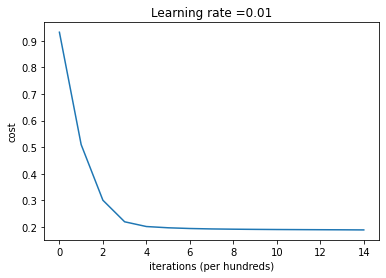

On the train set:
Accuracy: 0.9272727272727272
On the test set:
Accuracy: 0.8963414634146342


In [9]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

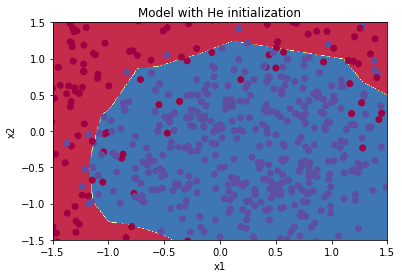

In [10]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)